# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as py

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
all_text = mars_soup.find('div', class_="container py-4")
print(all_text)

<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

# Create an empty list
new_list = {}

# #####table = mars_soup.find('div', class_='p-5 mb-4 bg-light rounded-3')
table = mars_soup.find('table')
rows = table.find_all('tr')

# Loop through the scraped data to create a list of rows
# #####for row in mars_soup.find_all('div', class_='p-5 mb-4 bg-light rounded-3'):
for row in rows:
    row_heading = row.find_all('th').text
    row_data_tag = row.find_all('td')
    row_data = row_data_tag.text if row_data_tag is not None else ''
    new_list[row_heading] = row_data

In [7]:
# Create an empty list
new_list = {}

table = mars_soup.find('div', class_='p-5 mb-4 bg-light rounded-3')
table = mars_soup.find('table')
rows = table.find_all('tr')

# Loop through the scraped data to create a list of rows
# #####for row in mars_soup.find_all('div', class_='p-5 mb-4 bg-light rounded-3'):
for row in rows:
    row_heading_tag = row.find('th')
    if row_heading_tag is None:
        continue
    row_heading = row_heading_tag.text
    row_data_tag = row.find('td')
    row_data = row_data_tag.text.strip() if row_data_tag is not None else ''
    new_list[row_heading] = row_data

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
df


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [9]:
# Confirm DataFrame was created successfully
mars_df = df[0]
mars_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = mars_df.iloc[1:]
mars_df
# print(mars_df.head())

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(mars_df.dtypes)


id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [11]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype('int')
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
mars_df['sol'] = mars_df['sol'].astype('int')
mars_df['ls'] = mars_df['ls'].astype('int')
mars_df['month'] = mars_df['month'].astype('int')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df['pressure'].astype('int')
# mars_df['terrestrial_date']
mars_df

/Users/gavinwan/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gavinwan/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gavinwan/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,13,2012-08-17,11,156,6,-76.0,740
2,24,2012-08-18,12,156,6,-76.0,741
3,35,2012-08-19,13,157,6,-74.0,732
4,46,2012-08-20,14,157,6,-74.0,740
5,57,2012-08-21,15,158,6,-78.0,740
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730
1863,1892,2018-02-24,1974,134,5,-77.0,729
1864,1894,2018-02-25,1975,134,5,-76.0,729
1865,1893,2018-02-26,1976,135,5,-77.0,728


In [12]:
print(mars_df['terrestrial_date'].dtype)

datetime64[ns]


In [13]:
# Confirm type changes were successful by examining data types again
print(mars_df['id'].dtype)
print(mars_df['terrestrial_date'].dtype)
print(mars_df['sol'].dtype)
print(mars_df['ls'].dtype)
print(mars_df['month'].dtype)
print(mars_df['min_temp'].dtype)
print(mars_df['pressure'].dtype)


int64
datetime64[ns]
int64
int64
int64
float64
int64


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
start_date = mars_df['terrestrial_date'].min()
# start_date
end_date = mars_df['terrestrial_date'].max()
end_date
num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1
num_months

/Users/gavinwan/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


67

In [15]:
# 2. How many Martian days' worth of data are there?
num_sols = len(mars_df)
num_sols


1866

In [16]:
# 3. What is the average low temperature by month?
avg_lowtemp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_lowtemp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.301370
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

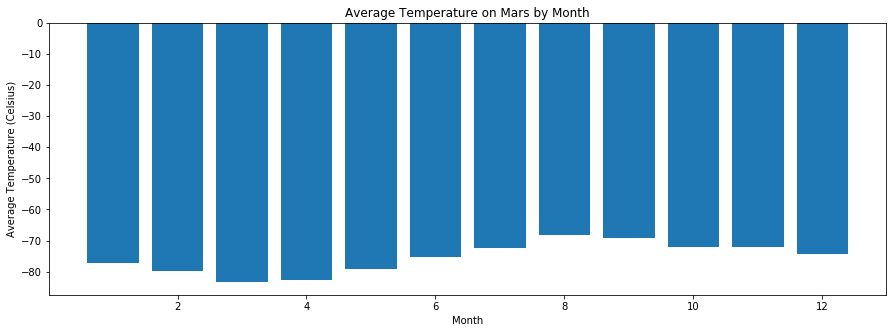

In [17]:
# Plot the average temperature by month
plt.figure(figsize=(15,5))
plt.bar(avg_lowtemp_by_month.index, avg_lowtemp_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Temperature on Mars by Month')
# plt.tight_layout()
plt.show()

In [18]:
# Identify the coldest and hottest months in Curiosity's location
coldest_months = avg_lowtemp_by_month.sort_values().index[:3].sort_values().tolist()
hottest_months = avg_lowtemp_by_month.sort_values(ascending=False).index[:3].sort_values().tolist()

print("Coldest months:", coldest_months)
print("Hottest months:", hottest_months)

Coldest months: [2, 3, 4]
Hottest months: [8, 9, 10]


In [19]:
# 4. Average pressure by Martian month
avg_pressure_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.095890
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0, 0.5, 'Pressure')

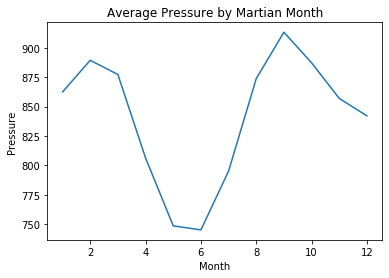

In [20]:
# Plot the average pressure by month
plt.plot(avg_pressure_month.index, avg_pressure_month.values)
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Pressure')

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# min_date = mars_df['terrestrial_date'].min()
# max_date = mars_df['terrestrial_date'].max()
# Find the minimum and maximum terrestrial_date values in mars_df
min_date = mars_df['terrestrial_date'].min()
max_date = mars_df['terrestrial_date'].max()
terrestrial_earth_date = max_date - min_date
print(terrestrial_earth_date)

# Find the corresponding sol values
min_sol = mars_df.loc[mars_df['terrestrial_date'] == min_date, 'sol'].iloc[0]
max_sol = mars_df.loc[mars_df['terrestrial_date'] == max_date, 'sol'].iloc[0]

# Calculate the number of sols in a Martian year
sols_per_year = max_sol - min_sol
print(sols_per_year)

# Calculate the number of Earth days in a Martian year
earth_days_per_year = (max_date - min_date).days / sols_per_year * 365.25

print("There are approximately Base on Mars Data Frame", earth_days_per_year, "Earth days in a Martian year.  But at the bottom have an explanation:The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days. ")

2020 days 00:00:00
1966
There are approximately Base on Mars Data Frame 375.28229908443535 Earth days in a Martian year.  But at the bottom have an explanation:The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days. 


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

# The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [37]:
# Write the data to a CSV
# mars_df.to_csv('mars_weather_data.csv')
mars_df.to_csv('mars_weather_data.csv', index=False)

In [22]:
browser.quit()